# Projeto Base de Dados Avaliação de Imóveis

Por SEFMG

Data: 2018

In [1]:
import pandas as pd
import json
from timeit import default_timer as timer
import numpy as np
import requests
import re
import os
pd.set_option('display.max_colwidth', -1)

## Juntando informação

In [2]:
# lER ARQUIVO DA CIDADE DE CONSELHEIRO LAFAIETE e armazenar em Pandas DataFrame

xlsx = pd.ExcelFile('IPTU_Contagem.xlsx')

df_iptu_Contagem = pd.read_excel(xlsx, 'Contagem')

In [2]:
# lER ARQUIVO HISTORICO SEF e armazenar em Pandas DataFrame

xlsx = pd.ExcelFile('Historico_SEF3.xlsx')

df_Historico_SEF = pd.read_excel(xlsx, 'Historico_SEF')

In [3]:
# Exibindo as 5 primeiras linhas da tabela
df_iptu_Contagem.head(5)

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,Especie,Logradouro,Numero,Bairro,CEP,Cidade,Ano,Fracao_ideal,ITBI
0,10010675001,1238.75,644.0,NaN,Galpao,LOUIS ENSCH,105,CIDADE INDUSTRIAL,NaN,CONTAGEM,2017,2.911,1498813.52
1,10010675002,767.49,399.0,NaN,Galpao,LOUIS ENSCH,97,CIDADE INDUSTRIAL,NaN,CONTAGEM,2017,1.803,884646.93
2,10010675003,1323.39,688.0,NaN,Galpao,LOUIS ENSCH,97,CIDADE INDUSTRIAL,NaN,CONTAGEM,2017,3.109,1525430.13
3,10010675004,1867.75,971.0,NaN,Galpao,LOUIS ENSCH,97,CIDADE INDUSTRIAL,NaN,CONTAGEM,2017,4.389,2153303.28
4,10010675005,636.69,331.0,NaN,Galpao,LOUIS ENSCH,97,CIDADE INDUSTRIAL,NaN,CONTAGEM,2017,1.496,733978.26


In [45]:
# Exibindo as 5 primeiras linhas da tabela
df_Historico_SEF.head(5)

,NR_PROT_DECLARACAO,INDICE_CADASTRAL,AREA_TERRENO,AREA_CONSTRUIDA,ESPECIE,CEP,CIDADE,TP_LOGRADOURO,LOGRADOURO,NUMERO,BAIRRO,SEF,DATA,COMPLEMENTO1
0,201103423329,4250360160077,800.0,68.20,AP,31030220.0,BELO HORIZONTE,RUA,GENOVEVA DE SOUZA,531,SAGRADA FAMILIA,131967.00,2011,106
1,201300510407,500171002A0159,489.0,78.42,AP,30421185.0,BELO HORIZONTE,RUA,OLINDA,544,NOVA SUISSA,58226.86,2010,302
2,201302531487,307005A0020332,2046.0,94.74,AP,31330670.0,BELO HORIZONTE,RUA,PROFESSOR DOMICIO MURTA,390,OURO PRETO,236544.78,2012,804
3,201403207881,106001B0012555,1618.5,56.00,AP,31015172.0,BELO HORIZONTE,RUA,CURVELO,132,FLORESTA,211405.82,2013,1.114 BLOCO B
4,201405062509,1131740050326,1169.4,167.67,AP,30320080.0,BELO HORIZONTE,RUA,PATAGONIA,379,SION,508710.78,2014,803


## Avaliação de dados

Depois de coletar cada um dos dados acima, avaliar visualmente e programaticamente em busca de problemas de qualidade e limpeza. 

### IPTU Contagem

In [4]:
# Informações da tabela
df_iptu_Contagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226139 entries, 0 to 226138
Data columns (total 13 columns):
Indice_cadastral    226139 non-null int64
Area_terreno        226139 non-null float64
Area_construcao     226139 non-null float64
IPTU                0 non-null float64
Especie             226139 non-null object
Logradouro          226139 non-null object
Numero              226139 non-null int64
Bairro              226139 non-null object
CEP                 0 non-null float64
Cidade              226139 non-null object
Ano                 226139 non-null int64
Fracao_ideal        226139 non-null float64
ITBI                226139 non-null float64
dtypes: float64(6), int64(3), object(4)
memory usage: 22.4+ MB


In [5]:
# Ver estatisticas do DataFrame dos valores nulos
df_iptu_Contagem.isnull().sum()

Indice_cadastral    0     
Area_terreno        0     
Area_construcao     0     
IPTU                226139
Especie             0     
Logradouro          0     
Numero              0     
Bairro              0     
CEP                 226139
Cidade              0     
Ano                 0     
Fracao_ideal        0     
ITBI                0     
dtype: int64

In [6]:
# ver os 5 ultimos registros do DataFrame
df_iptu_Contagem.tail()

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,Especie,Logradouro,Numero,Bairro,CEP,Cidade,Ano,Fracao_ideal,ITBI
226134,1110620017002,47.56,19.0,NaN,Garagem,VC 03,875,NOVA CONTAGEM,NaN,CONTAGEM,2017,16.522,18120.55
226135,1110660323001,80.85,36.0,NaN,Casa,VP 01,1695,NOVA CONTAGEM,NaN,CONTAGEM,2017,24.016,44882.14
226136,1110660323002,255.80,113.9,NaN,Loja,VP 01,1695,NOVA CONTAGEM,NaN,CONTAGEM,2017,75.984,263406.13
226137,1110680080001,171.05,100.0,NaN,Casa,VC 02,30,NOVA CONTAGEM,NaN,CONTAGEM,2017,100.000,169198.75
226138,1110770017001,249.48,42.0,NaN,Casa,VL 27,859,NOVA CONTAGEM,NaN,CONTAGEM,2017,100.000,59098.04


In [7]:
# Ver estatisticas do DataFrame
df_iptu_Contagem.describe()

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,Numero,CEP,Ano,Fracao_ideal,ITBI
count,2.261390e+05,226139.000000,226139.000000,0.0,226139.000000,0.0,226139.0,226139.000000,2.261390e+05
mean,7.391563e+10,327.327048,100.886653,NaN,606.437028,NaN,2017.0,37.794016,2.521724e+05
std,5.036017e+10,3591.125983,448.611170,NaN,11331.781422,NaN,0.0,37.118494,1.445005e+06
min,1.001068e+10,0.000000,0.000000,NaN,0.000000,NaN,2017.0,0.000000,0.000000e+00
25%,4.225080e+10,55.400000,41.700000,NaN,88.000000,NaN,2017.0,5.633000,8.066649e+04
50%,8.126016e+10,122.210000,61.800000,NaN,222.000000,NaN,2017.0,23.256000,1.327423e+05
75%,1.006201e+11,300.000000,100.100000,NaN,520.000000,NaN,2017.0,66.472500,2.422810e+05
max,1.110770e+12,769926.800000,90329.740000,NaN,999999.000000,NaN,2017.0,100.004000,2.074479e+08


In [8]:
df_iptu_Contagem.columns

Index(['Indice_cadastral', 'Area_terreno', 'Area_construcao', 'IPTU',
       'Especie', 'Logradouro', 'Numero', 'Bairro', 'CEP', 'Cidade', 'Ano',
       'Fracao_ideal', 'ITBI'],
      dtype='object')

In [9]:
# Verificar os valores unicos de bairro
df_iptu_Contagem["Bairro"].unique()

array(['CIDADE INDUSTRIAL', 'PARQUE RIACHO DAS PEDRAS - 1A',
       'VILA APARECIDA', 'VILA SANTO ANTONIO', 'VILA SAO NICODEMOS',
       'VILA VAQUINHA', 'VILA SAO VICENTE', 'VILA DO CANAL', 'ARCADIA',
       'VILA ITAU', 'VILA BARRAGINHA', 'VILA PTO',
       'RETIRO DAS ESPERANCAS', 'VILA DARCY RIBEIRO', 'JK',
       'CIDADE JARDIM ELDORADO', 'AGUA BRANCA', 'SANTA CRUZ INDUSTRIAL',
       'DA GLORIA', 'NOVO ELDORADO', 'PARQUE BELO HORIZONTE INDUSTRI',
       'VILA JARDIM ELDORADO', 'GRANJA LEMPP', 'INCONFIDENTES',
       'VERA CRUZ', 'PARQUE RIACHO DAS PEDRAS - 2A',
       'CONJ. HAB. JARDIM CALIFORNIA',
       'AREA INDUSTRIAL E LAZER RIACHO DAS PEDRAS', 'VILA SAO PAULO',
       'INDUSTRIAL 3A SECAO', 'INDUSTRIAL 1A E 2A SECAO', 'BANDEIRANTES',
       'JARDIM INDUSTRIAL', 'FLORICULTURA LEMPP', 'VILA LIDER',
       'VILA RUI BARBOSA', 'VILA PARQUE INDUSTRIAL', 'VILA PERNAMBUCANA',
       'VILA PRESIDENTE VARGAS', 'VILA VITORIA', 'INDUSTRIAL ITAU',
       'INDUSTRIAL SANTA RITA', 'AMAZ

In [12]:
# Verificar os valores unicos de logradouro
df_iptu_Contagem["Logradouro"].unique()

array(['LOUIS ENSCH', 'CARDEAL EUGENIO PACELLI', 'PEDRO PACHECO', ...,
       'AMARILIS', 'TULIPA', 'FLOR DE LIS'], dtype=object)

In [37]:
df_iptu_Contagem['Logradouro'].loc[df_iptu_Contagem['Logradouro'].str.contains("\.", na=False, regex=True)]

1773      AV.JORGE FERREIRA GOMES 
1774      AV.JORGE FERREIRA GOMES 
1775      AV.JORGE FERREIRA GOMES 
1776      AV.JORGE FERREIRA GOMES 
1777      AV.JORGE FERREIRA GOMES 
18795     FELISBERTA F.DE CARVALHO
18796     FELISBERTA F.DE CARVALHO
18797     FELISBERTA F.DE CARVALHO
18798     FELISBERTA F.DE CARVALHO
18799     FELISBERTA F.DE CARVALHO
18800     FELISBERTA F.DE CARVALHO
18801     FELISBERTA F.DE CARVALHO
18802     FELISBERTA F.DE CARVALHO
18803     FELISBERTA F.DE CARVALHO
18804     FELISBERTA F.DE CARVALHO
18805     FELISBERTA F.DE CARVALHO
18806     FELISBERTA F.DE CARVALHO
18807     FELISBERTA F.DE CARVALHO
18808     FELISBERTA F.DE CARVALHO
18809     FELISBERTA F.DE CARVALHO
18810     FELISBERTA F.DE CARVALHO
18811     FELISBERTA F.DE CARVALHO
18812     FELISBERTA F.DE CARVALHO
18813     FELISBERTA F.DE CARVALHO
18814     FELISBERTA F.DE CARVALHO
18815     FELISBERTA F.DE CARVALHO
18816     FELISBERTA F.DE CARVALHO
18817     FELISBERTA F.DE CARVALHO
18818     FELISBERTA

### Histórico SEF

In [3]:
# Informações da tabela
df_Historico_SEF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788850 entries, 0 to 788849
Data columns (total 14 columns):
NR_PROT_DECLARACAO    788850 non-null int64
INDICE_CADASTRAL      516409 non-null object
AREA_TERRENO          788835 non-null float64
AREA_CONSTRUIDA       788835 non-null float64
ESPECIE               247757 non-null object
CEP                   737446 non-null float64
CIDADE                737446 non-null object
TP_LOGRADOURO         737446 non-null object
LOGRADOURO            737446 non-null object
NUMERO                641436 non-null object
BAIRRO                737433 non-null object
SEF                   788738 non-null float64
DATA                  788850 non-null int64
COMPLEMENTO1          56084 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 84.3+ MB


In [4]:
# Informações da tabela
df_Historico_SEF.head(10)

,NR_PROT_DECLARACAO,INDICE_CADASTRAL,AREA_TERRENO,AREA_CONSTRUIDA,ESPECIE,CEP,CIDADE,TP_LOGRADOURO,LOGRADOURO,NUMERO,BAIRRO,SEF,DATA,COMPLEMENTO1
0,201103423329,4250360160077,800.00,68.20,AP,31030220.0,BELO HORIZONTE,RUA,GENOVEVA DE SOUZA,531,SAGRADA FAMILIA,131967.00,2011,106
1,201300510407,500171002A0159,489.00,78.42,AP,30421185.0,BELO HORIZONTE,RUA,OLINDA,544,NOVA SUISSA,58226.86,2010,302
2,201302531487,307005A0020332,2046.00,94.74,AP,31330670.0,BELO HORIZONTE,RUA,PROFESSOR DOMICIO MURTA,390,OURO PRETO,236544.78,2012,804
3,201403207881,106001B0012555,1618.50,56.00,AP,31015172.0,BELO HORIZONTE,RUA,CURVELO,132,FLORESTA,211405.82,2013,1.114 BLOCO B
4,201405062509,1131740050326,1169.40,167.67,AP,30320080.0,BELO HORIZONTE,RUA,PATAGONIA,379,SION,508710.78,2014,803
5,201502055434,NaN,998.82,154.86,AP,30130160.0,BELO HORIZONTE,RUA,ALAGOAS,335,FUNCIONARIOS,733618.94,2014,1402
6,201504607992,NaN,132.50,64.80,AP,36893000.0,MIRADOURO,RUA,Antônio Gomes Martins,31,Centro,44296.00,2015,101
7,201304419160,0140080070120,600.00,119.00,AP,30150100.0,BELO HORIZONTE,AVENIDA,ASSIS CHATEAUBRIAND,183,FLORESTA,399946.62,2013,601
8,201305351260,010702201540027,1205.68,70.46,AP,35930001.0,JOAO MONLEVADE,AVENIDA,WILSON ALVARENGA,1864,CARNEIRINHOS,176000.00,2014,203
9,201405917547,101003D0330209,1103.00,109.37,AP,30220000.0,BELO HORIZONTE,RUA,DO OURO,826,SERRA,557764.03,2014,301


#### Problemas de Qualidade

##### tabelas

##### IPTU_Contagem:

- Necesssário avaliar registros da coluna bairro e logradouro(Todos devem ser maiusculos, sem acentos e espaços duplos em branco)
- Coluna logradouro será necessário tratar casos para deixar os nomes padronizados. Olhar documentação "procedimento limpeza contagem" escrita pelo Cristiano.

##### Historico_SEF:

- Tipos de dados errados (Indice_cadastral e numero devem ser numericas. Cep deve ser string).
- Necesssário avaliar registros da coluna COMPLEMENTO1 (dados alfanumericos ex: "102, Matrícula 77972", "101/A")
- Colunas Logradouro e Bairro registros com acentos, minusculos e maiusculos. 

#### Problemas de Arrumação

##### tabelas

#### `iptu_Conselheiro_lafaiete` :

- Eliminar registro nulo de Indice_cadastral
- Retiar espaços em branco de registro das colunas Area_terreno e Area_construcao
- Colunas criadas como `object` (Area_terreno e Area_construcao) devem ser convertidas em objeto float
- Coluna numero com valores alfanumericos ex: (726BB)	
- Coluna `Complemento` procurar por palavra 'AP' e extrair o numero do apartamento. Criar coluna Numero apartamento e Atualizar a coluna 'Andar' com o primeiro digito do numero encontrado caso o mesmo possuir até 3 algarismos. Para mais de 3, atualizar com os 2 primeiros. obs: Existem registros com 'ap' mas o numero do apartamento é especificado com letras('A','B', 'C'...) o que fazer?

#### `Historico_SEF` :

- Converter colunas Indice_cadastral e numero para o tipo int. Converter cep para string.
- Criar a coluna andar e numero do apartamento. Extrair o numero desejado conforme regras do arquivo "Procedimento limpeza contagem" criado pelo Cristiano. 
- Colunas “Bairros” e “Logradouro” passar todos os caracteres para maiúsculo, sem cedilha, sem til, sem acentos, etc...

#### Ambas as tabelas

- Arquivo IPTU, regras:

1-	Apartamentos com 4 números ou mais. <br />
a)	De 1000 a 2999 – Pega-se os dois primeiros números como andar; <br />
b)	De 3000 a 9999- Pega-se o primeiro numero como andar (pois acho muito difícil um prédio de mais de 30 andares. <br />
2-	Apartamentos com 3 números. Esse quase não tem erro. Pega-se o primeiro número; <br />
3-	Apartamentos com 2 números ou 1 número, deixa em aberto para preenchimento; <br />

- Arquivo “histórico_sef”, regras;

1-	Apartamentos com 4 números ou mais. <br />
a)	De 1000 a 2999 – Pega-se os dois primeiros números como andar; <br />
b)	De 3000 a 9999- Pega-se o primeiro numero como andar (pois acho muito difícil um prédio de mais de 30 andares). <br />
2-	Apartamentos com 3 números. Esse quase não tem erro. Pega-se o primeiro número; <br />
3-	Apartamentos com 2 números. Pega-se o primeiro número (considerando os que começam com 1, se começar com zero vai para opção seguinte).; <br />
4-	Apartamentos com 1 número – Considera-se todos como andar 1



## Limpeza de dados

## Funções

In [99]:
# Tudo maisculo e remove Acentos
from unicodedata import normalize

def maiusculo_remover_acentos_espacos_brancos(txt):
    txt = re.sub("\s+", " ", txt)
    return normalize('NFKD', txt.upper()).encode('ASCII', 'ignore').decode('ASCII')

def minusculo_remover_acentos_espacos_brancos(txt):
    txt = re.sub("\s+", " ", txt)
    return normalize('NFKD', txt.casefold()).encode('ASCII', 'ignore').decode('ASCII')

In [ ]:
def retorna_texto_formato_regra(texto, caracter):
    # verifica se o caractere esta no texto
    if caracter in texto:
        #pega a string apos o ultimo caractere encontrado
        s = texto.rsplit('.')[-1]
        if s.isspace():
            return texto
        else:
            return ' '.join(texto.rsplit('.')[-1])
    else:
        return texto   

In [141]:
#Função para verificar se dado é inteiro
def verifica_dado(s):
    if type(s) == int:
       return s
    else:
        valor = ""
        valor = re.sub('[^0-9]', '', s)
        return valor

In [193]:
#Função para verificar o numero do andar
def verifica_andar(nuAp):
    andar = 0
    if (nuAp>=100) and (nuAp<=999): 
        andar = int(nuAp/100)
    elif (nuAp>=1000) and (nuAp<=2999): 
        andar = int(nuAp/100)
    elif (nuAp>=3000) and (nuAp<=9999): 
        andar = int(nuAp/1000)
    return andar 

15


In [104]:
#Função para verificar o numero do andar por extenso
def verifica_andar_extenso(texto):
    andarExtenso  = ['primeiro', 'segundo', 'terceiro', 'quarto', 'quinto', 'sexto', 'setimo', 'oitavo', 'nono', 'decimo']
    andarResposta = [1, 2 , 3, 4 , 5 , 6, 7, 8, 9, 10]
    resposta = ""
    for q, a in zip(andarExtenso, andarResposta):
        if texto.count(q) > 0:
            resposta = a
            break
    
    return resposta

In [75]:
print(maiusculo_remover_acentos_espacos_brancos('Prof.        Cicero'))

PROF. CICERO


In [73]:
#print(retorna_texto_formato_regra('Prof.Ci. cero', '.'))
print(retorna_texto_formato_regra('Prof.Ci. cero', '.'))

  c e r o


In [128]:
# copiar os dataframes 
df_iptu_Conselheiro_lafaiete_clean = df_iptu_Conselheiro_lafaiete.copy()

In [5]:
df_historico_sef_clean = df_Historico_SEF.copy()

### IPTU Contagem

#### Definição 

Eliminar registro nulo de Indice_cadastral 

#### Código

In [129]:
df_iptu_Conselheiro_lafaiete_clean = df_iptu_Conselheiro_lafaiete_clean.dropna(subset=['Indice_cadastral'])

#### Teste

In [130]:
sum(df_iptu_Conselheiro_lafaiete_clean['Indice_cadastral'].isnull())

0

#### Definição 

Retirar espaços em branco de registro das colunas Area_terreno e Area_construcao

#### Código

In [131]:
df_iptu_Conselheiro_lafaiete_clean.at[53266, 'Area_terreno'] = 4.721

In [132]:
df_iptu_Conselheiro_lafaiete_clean.at[53266, 'Area_construcao'] = 84.112

#### Teste

In [133]:
df_iptu_Conselheiro_lafaiete_clean[df_iptu_Conselheiro_lafaiete_clean['Area_terreno'].str.contains("", na=False)].head()

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,Especie,Logradouro,Numero,Bairro,CEP,Complemento,Andar,Cidade,Ano


In [134]:
df_iptu_Conselheiro_lafaiete_clean[df_iptu_Conselheiro_lafaiete_clean['Area_construcao'].str.contains("", na=False)].head()

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,Especie,Logradouro,Numero,Bairro,CEP,Complemento,Andar,Cidade,Ano


#### Definição 

Converter as colunas 'object' Area_terreno e Area_construcao de uma string para objetos Float

#### Código

In [135]:
#verificar o tipo de dados dos registros das colunas
type(df_iptu_Conselheiro_lafaiete_clean['Area_terreno'].iloc[0])

float

In [136]:
type(df_iptu_Conselheiro_lafaiete_clean['Area_construcao'].iloc[0])

float

In [137]:
#Tem registro alfanumerico...
type(df_iptu_Conselheiro_lafaiete_clean['Indice_cadastral'].iloc[0])

int

In [138]:
type(df_iptu_Conselheiro_lafaiete_clean['Numero'].iloc[0])

KeyError: 'Numero'

In [140]:
#Usar pd.to_datetime para converter em float
df_iptu_Conselheiro_lafaiete_clean['Area_terreno'] = df_iptu_Conselheiro_lafaiete_clean['Area_terreno'].apply((float))
df_iptu_Conselheiro_lafaiete_clean['Area_construcao'] = df_iptu_Conselheiro_lafaiete_clean['Area_construcao'].apply((float))

In [142]:
#Usar pd.to_datetime para converter em inteiro
df_iptu_Conselheiro_lafaiete_clean['Indice_cadastral'] = df_iptu_Conselheiro_lafaiete_clean['Indice_cadastral'].apply(verifica_dado)
df_iptu_Conselheiro_lafaiete_clean['Indice_cadastral'] = df_iptu_Conselheiro_lafaiete_clean['Indice_cadastral'].apply((int))

In [203]:
df_iptu_Conselheiro_lafaiete_clean['Numero'] = df_iptu_Conselheiro_lafaiete_clean['Numero'].apply(verifica_dado)
df_iptu_Conselheiro_lafaiete_clean['Numero'] = df_iptu_Conselheiro_lafaiete_clean['Numero'].apply((int))

KeyError: 'Numero'

#### Teste

In [144]:
df_iptu_Conselheiro_lafaiete_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65533 entries, 0 to 65533
Data columns (total 13 columns):
Indice_cadastral    65533 non-null int64
Area_terreno        64706 non-null float64
Area_construcao     64706 non-null float64
IPTU                65532 non-null float64
Especie             5424 non-null object
Logradouro          65533 non-null object
Numero              48810 non-null object
Bairro              65530 non-null object
CEP                 0 non-null float64
Complemento         15004 non-null object
Andar               0 non-null float64
Cidade              65533 non-null object
Ano                 65533 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 9.5+ MB


In [145]:
df_iptu_Conselheiro_lafaiete_clean.describe()

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,CEP,Andar,Ano
count,6.553300e+04,6.470600e+04,64706.000000,6.553200e+04,0.0,0.0,65533.0
mean,5.416610e+05,6.003493e+02,65.566088,2.025080e+04,NaN,NaN,2017.0
std,4.043844e+05,1.182229e+04,231.449010,2.418887e+05,NaN,NaN,0.0
min,2.700000e+01,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,2017.0
25%,1.827100e+05,9.660250e+01,0.000000,3.694782e+03,NaN,NaN,2017.0
50%,3.673460e+05,2.450000e+02,43.160000,8.954200e+03,NaN,NaN,2017.0
75%,9.540120e+05,3.600000e+02,90.000000,1.819970e+04,NaN,NaN,2017.0
max,1.199288e+06,2.054363e+06,28867.000000,3.852403e+07,NaN,NaN,2017.0


#### Definição 

Coluna Complemento procurar por palavra 'AP' e extrair o numero do apartamento. Criar coluna Numero apartamento e Atualizar a coluna 'Andar' com o primeiro digito do numero encontrado caso o mesmo possuir até 3 algarismos. Para mais de 3, atualizar com os 2 primeiros. obs: Existe um registro 'PAPELARIA'. 

#### Código

In [146]:
# Criar coluna Numero_Apartamento do tipo inteiro e limpar coluna especie
df_iptu_Conselheiro_lafaiete_clean['Numero_Apartamento'] = 0
df_iptu_Conselheiro_lafaiete_clean['Especie'] = np.NaN

In [147]:
# Coluna Complemento que contém a palabra 'ap'
ap_to_replace = df_iptu_Conselheiro_lafaiete_clean.loc[df_iptu_Conselheiro_lafaiete_clean['Complemento'].str.contains("Ap|AP|ap", na=False)]

# Salvo os encontrados em uma lista
ap_to_replace_list = ap_to_replace['Complemento'].tolist()

# Percorrer a lista onde a palavras 'ap' aparecem em 'Complemento'  
# o valor é a palavra que aparece depois de "ap"

for entry in ap_to_replace_list:
    mask = df_iptu_Conselheiro_lafaiete_clean.Complemento == entry
    #Separar complemento em duas. pegor a string após ap
    numeroAp = 0
    entry = entry.lower().split('ap')[1]
    #verificar se nao possui apenas letras
    if not entry.isalpha():
        #Expressão regular para pegar todas as ocorrencias numericas. considero apenas os primeiros numeros encontrados
        #como o numero do apartamento.
        valor = re.findall('([0-9]+)', entry)
        numeroAp = ''.join(valor[0:1]).strip()
        if numeroAp == "":
            numeroAp = 0
    df_iptu_Conselheiro_lafaiete_clean.loc[mask, 'Numero_Apartamento'] = numeroAp    
    df_iptu_Conselheiro_lafaiete_clean.loc[mask, 'Especie'] = 'AP'

In [148]:
df_iptu_Conselheiro_lafaiete_clean['Numero_Apartamento'] = df_iptu_Conselheiro_lafaiete_clean['Numero_Apartamento'].apply((int))
df_iptu_Conselheiro_lafaiete_clean['Andar'] = 0
df_iptu_Conselheiro_lafaiete_clean['Andar'] = df_iptu_Conselheiro_lafaiete_clean['Andar'].apply((int))

In [125]:
#df_iptu_Conselheiro_lafaiete_clean['Numero_Apartamento'][df_iptu_Conselheiro_lafaiete_clean['Numero_Apartamento'] == 0] = np.nan

Z:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Teste

In [198]:
df_iptu_Conselheiro_lafaiete_clean.loc[df_iptu_Conselheiro_lafaiete_clean['Numero_Apartamento'] !=0]

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,Especie,Logradouro,Numero,Bairro,CEP,Complemento,Andar,Cidade,Ano,Numero_Apartamento
0,910112,53.800,136.460,23251.78,AP,DIAS DE SOUZA,15,CENTRO,NaN,* AP 4,0,CONSELHEIRO LAFAIETE,2017,4
42,1125033,13.930,49.460,5598.23,AP,AUGUSTO GETULIO VIEIRA,649,SAO DIMAS,NaN,* 1ｺPAV - APTｺ 101,1,CONSELHEIRO LAFAIETE,2017,101
64,1127199,54.760,205.200,39442.63,AP,AUGUSTO GETULIO VIEIRA,649,SAO DIMAS,NaN,* 2ｺPAV- APTｺ 201,2,CONSELHEIRO LAFAIETE,2017,201
66,1067125,275.000,0.000,3666.01,AP,PROFESSOR MANOEL LINO,519,MUSEU,NaN,* 2ｰPAV - APTｺ 01,0,CONSELHEIRO LAFAIETE,2017,1
67,1156933,NaN,NaN,0.00,AP,JOSE ANTONIO BELCHIOR,51,LOURDES,NaN,* A - APTｺ 02,0,CONSELHEIRO LAFAIETE,2017,2
68,1156944,NaN,NaN,0.00,AP,AMAZONAS,683,SAO JOAO,NaN,* A-APTｺ 101,1,CONSELHEIRO LAFAIETE,2017,101
75,1112977,66.140,67.010,8297.90,AP,COMENDADOR BAETA NEVES,115,CENTRO,NaN,* AP 4,0,CONSELHEIRO LAFAIETE,2017,4
85,1142077,60.759,105.220,16236.36,AP,CORONEL JOAO GOMES,179,SANTO ANTONIO,NaN,* AP 01,0,CONSELHEIRO LAFAIETE,2017,1
92,1135933,30.900,128.600,24810.37,AP,MARIA AUGUSTA,700,SANTA MATILDE,NaN,* AP 01,0,CONSELHEIRO LAFAIETE,2017,1
93,1074299,52.310,101.900,15670.29,AP,DOUTOR CAMPOLINA,412,SAO SEBASTIAO,NaN,* AP 01,0,CONSELHEIRO LAFAIETE,2017,1


In [199]:
df_iptu_Conselheiro_lafaiete_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65533 entries, 0 to 65533
Data columns (total 14 columns):
Indice_cadastral      65533 non-null int64
Area_terreno          64706 non-null float64
Area_construcao       64706 non-null float64
IPTU                  65532 non-null float64
Especie               5426 non-null object
Logradouro            65533 non-null object
Numero                48810 non-null object
Bairro                65530 non-null object
CEP                   0 non-null float64
Complemento           15004 non-null object
Andar                 65533 non-null int64
Cidade                65533 non-null object
Ano                   65533 non-null int64
Numero_Apartamento    65533 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 10.0+ MB


#### Definição 

Coluna Numero do apartamento será usada para definir o numero do andar

#### Código

In [194]:
df_iptu_Conselheiro_lafaiete_clean['Andar'] = df_iptu_Conselheiro_lafaiete_clean['Numero_Apartamento'].apply(verifica_andar)

##### Teste

In [197]:
df_iptu_Conselheiro_lafaiete_clean.loc[df_iptu_Conselheiro_lafaiete_clean['Andar'] !=0]

,Indice_cadastral,Area_terreno,Area_construcao,IPTU,Especie,Logradouro,Numero,Bairro,CEP,Complemento,Andar,Cidade,Ano,Numero_Apartamento
42,1125033,13.930,49.460,5598.23,AP,AUGUSTO GETULIO VIEIRA,649,SAO DIMAS,NaN,* 1ｺPAV - APTｺ 101,1,CONSELHEIRO LAFAIETE,2017,101
64,1127199,54.760,205.200,39442.63,AP,AUGUSTO GETULIO VIEIRA,649,SAO DIMAS,NaN,* 2ｺPAV- APTｺ 201,2,CONSELHEIRO LAFAIETE,2017,201
68,1156944,NaN,NaN,0.00,AP,AMAZONAS,683,SAO JOAO,NaN,* A-APTｺ 101,1,CONSELHEIRO LAFAIETE,2017,101
1542,1144388,71.989,62.619,11391.11,AP,PREF. TELESFORO CANDIDO DE RESENDE,306,CENTRO,NaN,* AP 101,1,CONSELHEIRO LAFAIETE,2017,101
1548,1165800,NaN,NaN,0.00,AP,SANTA TEREZINHA,384,CARIJOS,NaN,* AP 101,1,CONSELHEIRO LAFAIETE,2017,101
1560,1112777,58.010,124.910,23505.25,AP,PREF. TELESFORO CANDIDO DE RESENDE,306,CENTRO,NaN,* AP 102,1,CONSELHEIRO LAFAIETE,2017,102
2116,894753,27.000,139.630,30850.09,AP,HORACIO DE QUEIROZ,96,CENTRO,NaN,* AP100,1,CONSELHEIRO LAFAIETE,2017,100
2120,1024094,0.000,188.550,22266.79,AP,TIRADENTES,105,CENTRO,NaN,* AP101,1,CONSELHEIRO LAFAIETE,2017,101
2125,1135566,69.350,266.030,50804.41,AP,PROFESSOR JOSE INACIO,60,ANGELICA,NaN,* AP101,1,CONSELHEIRO LAFAIETE,2017,101
2133,1111722,10.880,57.260,10156.93,AP,MARIO RODRIGUES,173,CACHOEIRA,NaN,* AP101,1,CONSELHEIRO LAFAIETE,2017,101


### Histórico SEF

#### Definição 

Coluna “complemento1” realizar a limpeza para restar apenas o andar do apartamento. 

#### Código

In [95]:
# Criar colunas do tipo inteiro: Numero_Apartamento e Andar
df_historico_sef_clean['Numero_Apartamento'] = 0
df_historico_sef_clean['Andar'] = 0

In [105]:
# Coluna Complemento que contém a palabra 'Pavimento' = 'pav'
pav_to_replace = df_historico_sef_clean.loc[df_historico_sef_clean['ESPECIE'].str.contains("Ap|AP|ap", na=False)]
pav_to_replace = pav_to_replace.loc[pav_to_replace['COMPLEMENTO1'].str.contains("Pav|PAv|PAV|pAV|paV|pav", na=False)]

#Pegar primeiro o numero anterior a palavra 'pav'. se não existir numero, pegor o depois.
# e palavras PRIMEIRO, SEGUNDO, TERCEIRO, QUARTO
# Salvo os encontrados em uma lista
pav_to_replace_list = pav_to_replace['COMPLEMENTO1'].tolist()

# Percorrer a lista onde a palavras 'pav' aparecem em 'Complemento1'  
# o valor é a palavra que aparece antes e depois de "pav"
for entry in pav_to_replace_list:
    mask = df_historico_sef_clean.COMPLEMENTO1 == entry
    #Separar complemento em duas. pegor a string antes e apos pav
    numeroAndar = 0
    valores = str(entry).lower().split('pav')
    valor1 = valores[0]
    valor2 = valores[1]
    numeroAndar = verifica_andar_extenso(minusculo_remover_acentos_espacos_brancos(valor1))
    numeros = re.findall('([0-9]+)', valor1)
    
    if numeroAndar == "":
        if len(numeros) > 0:
            #pega o ultimo numero(é o numero antes de 'pav')
            numeroAndar = numeros[-1]
        else:
            numeros = re.findall('([0-9]+)', valor2)
            if len(numeros) > 0:
                #pega o numero apos 'pav'
                numeroAndar = numeros[0]
    
    df_historico_sef_clean.loc[mask, 'Andar'] = numeroAndar    

In [114]:
# Coluna Complemento que contém a palabra 'Andar'
and_to_replace = df_historico_sef_clean.loc[df_historico_sef_clean['ESPECIE'].str.contains("Ap|AP|ap", na=False)]
and_to_replace = and_to_replace.loc[and_to_replace['COMPLEMENTO1'].str.contains("Andar|andar|ANDAR", na=False)]

#Pegar primeiro o numero anterior a palavra 'pav'. se não existir numero, pegor o depois.
# e palavras PRIMEIRO, SEGUNDO, TERCEIRO, QUARTO
# Salvo os encontrados em uma lista
and_to_replace_list = and_to_replace['COMPLEMENTO1'].tolist()

# Percorrer a lista onde a palavras 'pav' aparecem em 'Complemento1'  
# o valor é a palavra que aparece antes e depois de "pav"
for entry in and_to_replace_list:
    mask = df_historico_sef_clean.COMPLEMENTO1 == entry
    #Separar complemento em duas. pegor a string antes e apos pav
    numeroAndar = 0
    
    valores = str(entry).lower().split('andar')
    valor1 = valores[0]
    valor2 = valores[1]
    
    numeroAndar = verifica_andar_extenso(minusculo_remover_acentos_espacos_brancos(valor1))

    numeros = re.findall('([0-9]+)', valor1)
    
    if numeroAndar == "":
        if len(numeros) > 0:
            #pega o ultimo numero(é o numero antes de 'pav')
            numeroAndar = numeros[-1]
        else:
            numeros = re.findall('([0-9]+)', valor2)
            if len(numeros) > 0:
                #pega o numero apos 'pav'
                numeroAndar = numeros[0]
    
    df_historico_sef_clean.loc[mask, 'Andar'] = numeroAndar  

In [117]:
# Coluna Complemento que contém a palabra 'ap'
ap_to_replace = df_historico_sef_clean.loc[df_historico_sef_clean['ESPECIE'].str.contains("Ap|AP|ap", na=False)]
ap_to_replace = ap_to_replace.loc[ap_to_replace['COMPLEMENTO1'].str.contains("Ap|AP|ap", na=False)]

# Salvo os encontrados em uma lista
ap_to_replace_list = ap_to_replace['COMPLEMENTO1'].tolist()

# Percorrer a lista onde a palavras 'ap' aparecem em 'Complemento1'  
# o valor é a palavra que aparece depois de "ap"
for entry in ap_to_replace_list:
    mask = df_historico_sef_clean.COMPLEMENTO1 == entry
    #Separar complemento em duas. pegor a string após ap
    numeroAp = 0
    valores = str(entry).lower().split('ap')[1]
    #verificar se valor nao possui apenas letras
    if not valores.isalpha():
        #Expressão regular para pegar todas as ocorrencias numericas. considero apenas os primeiros numeros encontrados
        #como o numero do apartamento.
        valor = re.findall('([0-9]+)', valores)
        #print(valor)
        numeroAp = ''.join(valor[0:1]).strip()
        if numeroAp == "":
            numeroAp = 0
        df_historico_sef_clean.loc[mask, 'Numero_Apartamento'] = numeroAp  

In [119]:
#Encontrar o andar pelo complemento onde as colunas numero do apartamento e andar não foi localizado(igual a zero)
nuAp_to_replace = df_historico_sef_clean.loc[df_historico_sef_clean['ESPECIE'].str.contains("Ap|AP|ap", na=False)]
nuAp_to_replace = nuAp_to_replace.loc[(nuAp_to_replace['Numero_Apartamento'] == 0) and (nuAp_to_replace['Andar'] == 0)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Armazenando, analisando e visualizando os dados 

Armazene o(s) dataframe(s) limpo(s) em um arquivo CSV, com o principal deles intitulado twitter_archive_master.csv. Se adicionais existirem, os nomeie de forma apropriada. Além disso, você pode armazenar os dados limpos em um banco de dados SQLite (que também deve ser enviado, caso você o faça).

Analise e visualize seus dados wrangled em seu notebook Jupyter. Pelo menos três (3) insights e uma (1) visualização devem ser produzidos.

### Armazenar os dataframes limpos

In [209]:
# Salvar para excel (index == false) retira a coluna sequencial do dataframe
folder_name = 'Data_Final'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('iptu_Conselheiro_lafaiete_clean.xlsx', engine='xlsxwriter')
    
# Salvar os dataframes dos dados originais que foram limpos excel
df_iptu_Conselheiro_lafaiete_clean.to_excel(writer, sheet_name='Conselheiro_lafaiete', index=False)

# Salvar os dataframes dos dados originais que foram limpos csv
df_iptu_Conselheiro_lafaiete_clean.to_csv(folder_name+'/iptu_Conselheiro_lafaiete_clean.csv', index=False, sep=';')

In [213]:
# Salvar para sqllite
from sqlalchemy import create_engine
import datetime as dt

arquivo = 'imoveis.db'

if os.path.isfile(folder_name+'/'+arquivo):
    os.remove(folder_name+'/'+arquivo)

# Cria o SQLAlchemy Engine e esvazia o banco de dados sqlite weratedogs
engine = create_engine('sqllite:///'+folder_name+'/'+arquivo)

# Insere os dados de forma interativa no banco de dados sqlite weratedogs
# Evita o erro 'too many parameters'
start = dt.datetime.now()
chunksize = 6
j = 0
index_start = 1

for df in pd.read_csv(folder_name+'/iptu_Conselheiro_lafaiete_clean.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):

    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df.index += index_start
    j+=1
    print('{} segundos: concluído {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))

    df.to_sql('iptu_Conselheiro_lafaiete', engine, index=False, if_exists='append')
    index_start = df.index[-1] + 1

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:sqllite

## Analizar

#### Definição

- Qual é o nome do cachorro favorito e a foto dele?
- O cachorro favorito também tem mais retweets?
- Quais são os 5 principais nomes de cachorro mais populares?
- Quais foram os dispositivos utilizados nos twittes?

In [70]:
# Qual é o nome do cachorro favorito e a foto dele?
df = pd.read_sql_query('WITH tabela1 AS (SELECT tweet_id, MAX(favorite_count) ' 
                       'FROM twitter_archive_master '
                       'WHERE name IS NOT NULL ' 
                       'GROUP BY tweet_id '
                       'ORDER BY MAX(favorite_count) DESC '
                       'LIMIT 1) '
                       'SELECT master.tweet_id, master.name, master.jpg_url '  
                       'FROM twitter_archive_master master ' 
                       'INNER JOIN tabela1 on tabela1.tweet_id = master.tweet_id', engine)

In [71]:
# Setar a colunas texto com o maximo de espaço para exibir todo conteudo
pd.set_option('display.max_colwidth', -1)

df

,tweet_id,name,jpg_url
0,879415818425184262,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg


In [72]:
df.jpg_url

0    https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg
Name: jpg_url, dtype: object

#### Resultado

O nome do cão com mais favoritos é Duddles e a url da foto é mostrada no dataframe

In [73]:
# O cachorro favorito também tem mais retweets?
df2 = pd.read_sql_query('WITH tabela1 AS (SELECT tweet_id, MAX(favorite_count) ' 
                       'FROM twitter_archive_master ' 
                       'WHERE name IS NOT NULL ' 
                       'GROUP BY tweet_id '
                       'ORDER BY MAX(favorite_count) DESC '
                       'LIMIT 1), '
                       'tabela2 AS (SELECT tweet_id, MAX(retweet_count) '  
                       'FROM twitter_archive_master '
                       'WHERE name IS NOT NULL ' 
                       'GROUP BY tweet_id '
                       'ORDER BY MAX(retweet_count) DESC '
                       'LIMIT 1) '
                       'SELECT master.tweet_id, master.name, "favorito" as "Status" ' 
                       'FROM twitter_archive_master master '
                       'INNER JOIN tabela1 on tabela1.tweet_id = master.tweet_id '
                       'UNION '
                       'SELECT master.tweet_id, master.name, "mais retweets" as "Status" '  
                       'FROM twitter_archive_master master ' 
                       'INNER JOIN tabela2 on tabela2.tweet_id = master.tweet_id', engine)

In [74]:
df2

,tweet_id,name,Status
0,807106840509214720,Stephan,mais retweets
1,879415818425184262,Duddles,favorito


#### Resultado

O cão com mais favoritos não é o mesmo com mais retweets

In [75]:
# Quais são os 5 principais nomes de cachorro mais populares?
df3 = pd.read_sql_query('SELECT master.name, count(master.tweet_id) as qtde ' 
                        'FROM twitter_archive_master master '
                        'WHERE master.name is not null '
                        'GROUP BY master.name '
                        'ORDER BY qtde desc '
                        'LIMIT 5', engine)

df3

,name,qtde
0,Charlie,11
1,Cooper,10
2,Lucy,10
3,Oliver,10
4,Penny,9


### Resultado

O nome do cão mais polular é Charlie. Os outros quatro são exibidos no dataframe.

In [76]:
# Quais foram os dispositivos utilizados nos twittes?
df4 = pd.read_sql_query('SELECT DISTINCT master.source ' 
                        'FROM twitter_archive_master master ', engine)

df4

,source
0,Twitter for iPhone
1,Twitter Web Client
2,TweetDeck


### Resultado

Os meios utilizados para twitar são exibidos no dataframe. Vale lembrar que existia o registro vine.

### Visualização

- Quantidade de ocorrência da classificação dos cães.

In [77]:
import matplotlib.pyplot as plt
import random

colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

In [78]:
# Qual é a classificação mais comum dos cães?
df5 = pd.read_sql_query('SELECT master.stage, count(*) as qtde ' 
                        'FROM twitter_archive_master master '
                        'WHERE master.stage is not null '
                        'GROUP BY master.stage '
                        'ORDER BY qtde desc ', engine)


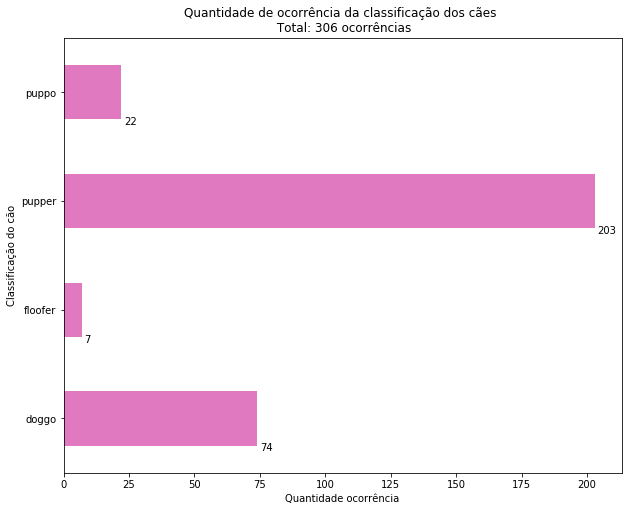

In [79]:
#quantidade de cada classificação dos cães
classificacao = df5.groupby('stage')['qtde'].sum().plot(kind='barh', figsize=(10,8), color=random.choice(colors))

# coloca a quantidade nas barras
for c in classificacao.patches:
    b=c.get_bbox()
    classificacao.annotate("{:.0f}".format(b.x1 + b.x0), (c.get_x() + c.get_width() + 1, c.get_y() - 0.05))
    
plt.title('Quantidade de ocorrência da classificação dos cães \n Total: '+ str(df5['qtde'].sum())+ ' ocorrências')
plt.xlabel('Quantidade ocorrência')
plt.ylabel('Classificação do cão')
plt.show()